**Linear regression without scikit-learn**

In [10]:
import pandas as pd

penguins = pd.read_csv("penguins_regression.csv")
penguins.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0



Notre objectif est de résoudre le problème suivant : en utilisant la longueur des nageoires d'un pingouin, nous aimerions déduire sa masse

Text(0.5, 1.0, 'Body Mass as a function of the Flipper Length')

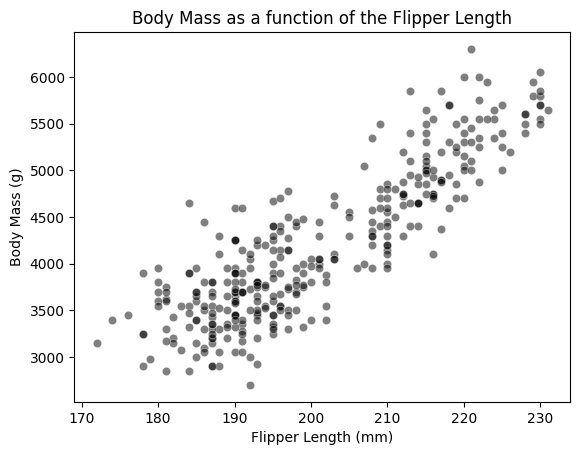

In [2]:
import seaborn as sns

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.set_title("Body Mass as a function of the Flipper Length")

In [3]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

En utilisant le modèle que nous avons défini ci-dessus, nous pouvons vérifier les valeurs de masse corporelle prédites pour une plage de longueurs de palmes. Nous définissons weight_flipper_length et intercept_body_mass sur des valeurs arbitraires de 45 et -5 000, respectivement.

In [4]:
import numpy as np

weight_flipper_length = 45
intercept_body_mass = -5000

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)

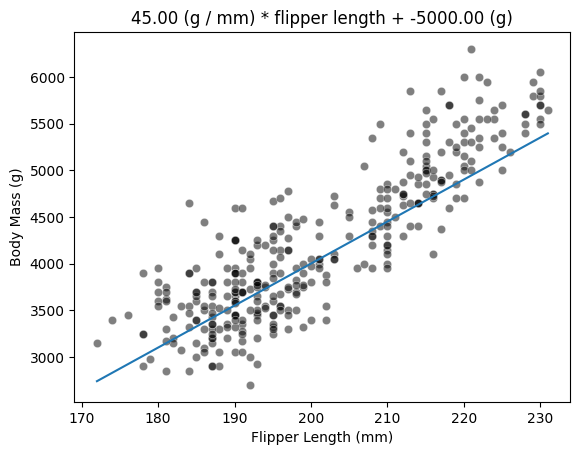

In [5]:
label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

La variable weight_flipper_length est un poids appliqué à la fonctionnalité flipper_length afin de faire l'inférence. Lorsque ce coefficient est positif, cela signifie que les manchots avec des nageoires plus longues ont une masse corporelle plus grande. Si le coefficient est négatif, cela signifie que les manchots avec des nageoires plus courtes ont une masse corporelle plus grande. Graphiquement, ce coefficient est représenté par la pente de la courbe sur le tracé. Ci-dessous, nous montrons à quoi ressemblerait la courbe lorsque le coefficient weight_flipper_length est négatif.

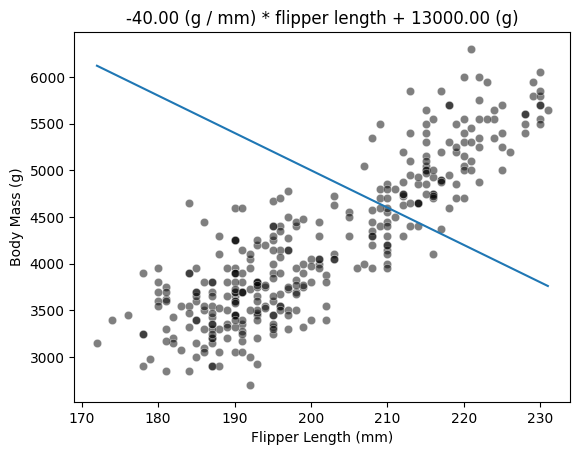

In [6]:
weight_flipper_length = -40
intercept_body_mass = 13000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)
ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

Dans notre cas, ce coefficient a une unité significative : g/mm. Par exemple, un coefficient de 40 g/mm signifie que pour chaque millimètre supplémentaire de longueur de palme, le poids corporel prévu augmente de 40 g.

In [7]:
body_mass_180 = linear_model_flipper_mass(
    flipper_length=180, weight_flipper_length=40, intercept_body_mass=0
)
body_mass_181 = linear_model_flipper_mass(
    flipper_length=181, weight_flipper_length=40, intercept_body_mass=0
)

print(
    "The body mass for a flipper length of 180 mm "
    f"is {body_mass_180} g and {body_mass_181} g "
    "for a flipper length of 181 mm"
)

The body mass for a flipper length of 180 mm is 7200 g and 7240 g for a flipper length of 181 mm


Nous pouvons également voir que nous avons un paramètre intercept_body_mass dans notre modèle. Ce paramètre correspond à la valeur sur l'axe y si flipper_length=0 (ce qui dans notre cas n'est qu'une considération mathématique, car dans nos données, la valeur de flipper_length ne va que de 170mm à 230mm). Cette valeur y lorsque x = 0 est appelée l'ordonnée à l'origine. Si intercept_body_mass vaut 0, la courbe passe par l'origine :

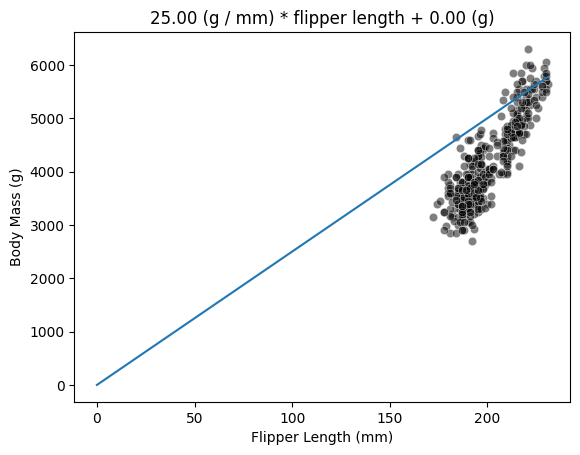

In [8]:
weight_flipper_length = 25
intercept_body_mass = 0

# redefined the flipper length to start at 0 to plot the intercept value
flipper_length_range = np.linspace(0, data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)
ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

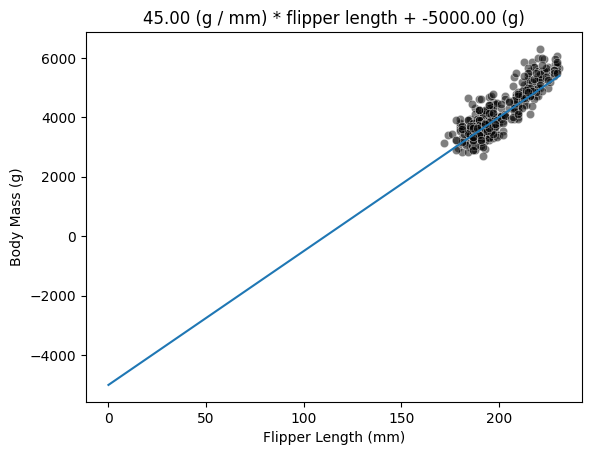

In [9]:
#Sinon, il passe par la valeur intercept_body_mass :
weight_flipper_length = 45
intercept_body_mass = -5000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)
ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

**Linear regression using scikit-learn**

In [11]:
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

In [12]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

In [14]:
weight_flipper_length = linear_regression.coef_[0]
print(weight_flipper_length)
intercept_body_mass = linear_regression.intercept_
print(intercept_body_mass)

49.68556640610011
-5780.831358077066


In [15]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass
)

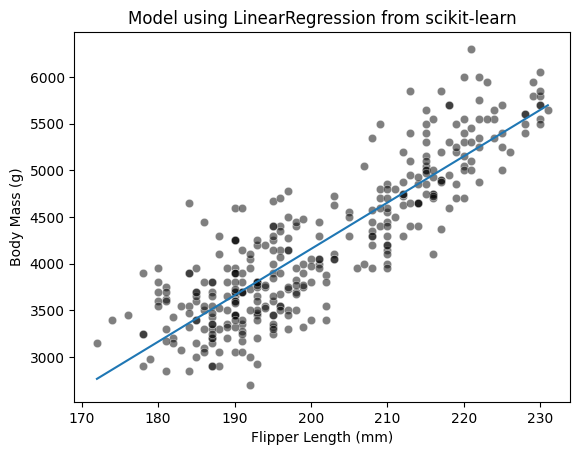

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

In [18]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154546.19


Un modèle de régression linéaire minimise l'erreur quadratique moyenne sur l'ensemble d'apprentissage. Cela signifie que les paramètres obtenus après l'ajustement (c'est-à-dire coef_ et intercept_) sont les paramètres optimaux qui minimisent l'erreur quadratique moyenne. En d’autres termes, tout autre choix de paramètres donnerait un modèle avec une erreur quadratique moyenne plus élevée sur l’ensemble d’apprentissage.

Cependant, l’erreur quadratique moyenne est difficile à interpréter. L'erreur absolue moyenne est plus intuitive puisqu'elle fournit une erreur dans la même unité que celle de la cible.

In [19]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g


Une erreur absolue moyenne de 313 signifie qu'en moyenne, notre modèle fait une erreur de ± 313 grammes lors de la prédiction de la masse corporelle d'un pingouin compte tenu de la longueur de ses nageoires.

**Linear models for classification**

In [36]:
import pandas as pd

penguins = pd.read_csv("penguins.csv")
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [37]:
# only keep the Adelie and Chinstrap classes
penguins = (
    penguins.set_index("species").loc[["Adelie", "Chinstrap"]].reset_index()
)
bill_columns = ["bill_length_mm", "bill_depth_mm"]
target_column = "species"

In [38]:
bill_columns

['bill_length_mm', 'bill_depth_mm']

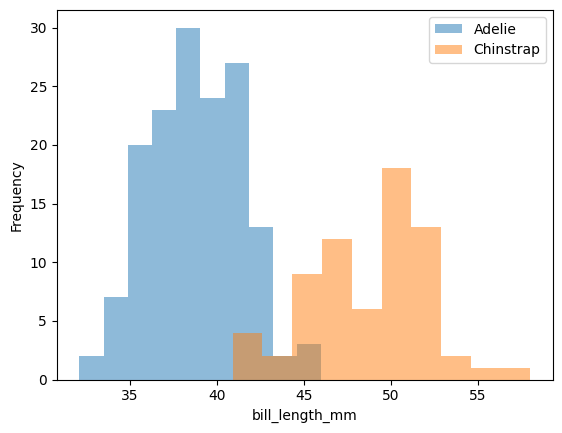

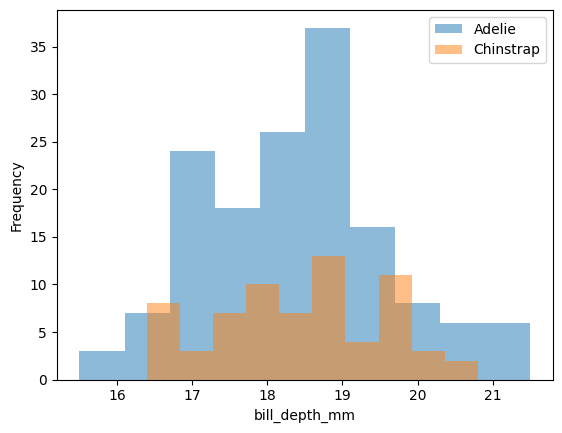

In [39]:
import matplotlib.pyplot as plt

for feature_name in bill_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

Nous pouvons constater que nous avons un problème assez simple. Lorsque la longueur du bec augmente, la probabilité que le manchot soit un manchot à jugulaire est plus proche de 1. Cependant, la profondeur du bec n'est pas utile pour prédire l'espèce de manchot

In [40]:
#Recherche de valeurs manquantes
penguins.isna().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  6
dtype: int64

In [41]:
#Pour simplicité : choix de la suppression de ces valeurs manquantes
penguins=penguins.dropna()

In [42]:
#Vérification
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [43]:
#Séparation des données en données d'entrainement et données test
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[bill_columns]
data_test = penguins_test[bill_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.981


Puisque nous avons affaire à un problème de classification contenant seulement 2 caractéristiques, il est alors possible d'observer la frontière de la fonction de décision. La limite est la règle utilisée par notre modèle prédictif pour affecter une étiquette de classe étant donné les valeurs des caractéristiques de l'échantillon.
Notez cependant que dans des contextes d'apprentissage automatique plus réalistes, on s'adapterait généralement à plus de deux fonctionnalités à la fois et il ne serait donc pas possible d'afficher une telle visualisation de la limite de décision en général.

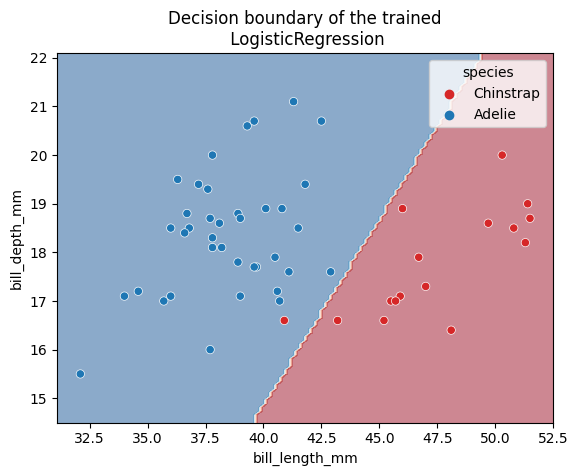

In [45]:
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=penguins_test,
    x=bill_columns[0],
    y=bill_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

Ainsi, on voit que notre fonction de décision est représentée par une droite séparant les 2 classes.

Pour le lecteur enclin aux mathématiques, l’équation de la limite de décision est :

coef0 * x0 + coef1 * x1 + intercept = 0
où x0 est « Longueur du Culmen (mm) » et x1 est « Profondeur du Culmen (mm) ».

Cette équation est équivalente à (en supposant que coef1 est non nul) :

x1 = coef0 / coef1 * x0 - interception / coef1
qui est l'équation d'une droite.

Vous pouvez accéder aux étapes du pipeline par nom ou par poste. Dans le code ci-dessus, logistique_regression[-1] désigne la dernière étape du pipeline. Ensuite, vous pouvez accéder aux attributs de cette étape tels que coef_. Notez également que l'attribut coef_ est un tableau de formes (1, n_features) et nous y accédons via sa première entrée. Alternativement, on pourrait utiliser coef_.ravel().

In [46]:
coefs = logistic_regression[-1].coef_[0]
weights = pd.Series(coefs, index=[f"Weight for '{c}'" for c in bill_columns])
weights

Weight for 'bill_length_mm'    3.895320
Weight for 'bill_depth_mm'    -1.053099
dtype: float64

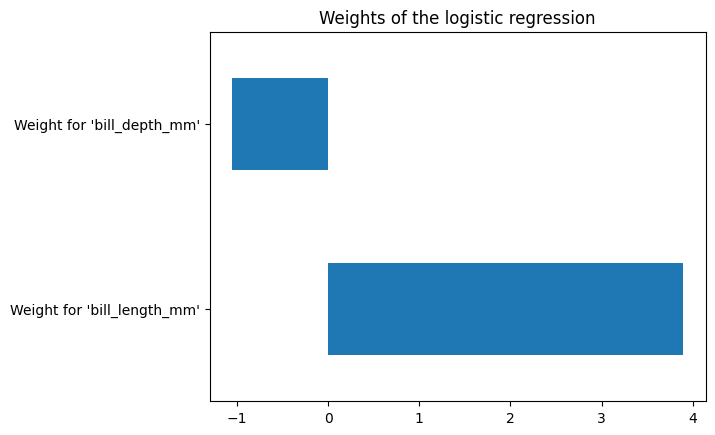

In [22]:
weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

La méthode de prévision dans les modèles de classification renvoie ce que nous appelons une « prédiction de classe dure », c'est-à-dire la classe la plus probable à laquelle appartiendrait un point de données donné. Nous pouvons confirmer l'intuition donnée par le DecisionBoundaryDisplay en testant sur un échantillon hypothétique

In [23]:
test_penguin = pd.DataFrame(
    {"bill_length_mm": [45], "bill_depth_mm": [17]}
)
logistic_regression.predict(test_penguin)

array(['Chinstrap'], dtype=object)

In [24]:
y_pred_proba = logistic_regression.predict_proba(test_penguin)
print(y_pred_proba)
y_pred_proba.shape

[[0.18046337 0.81953663]]


(1, 2)

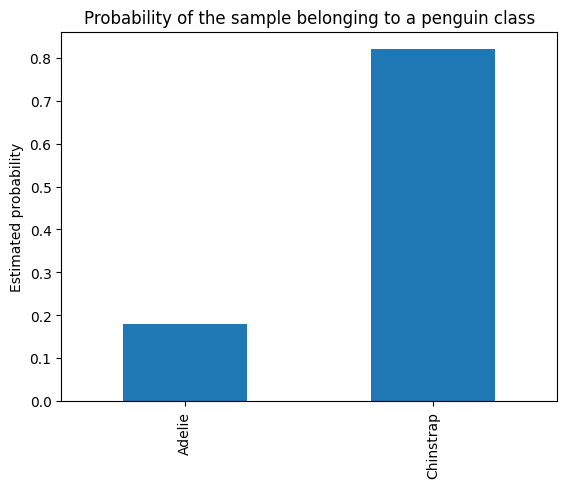

In [25]:
y_proba_sample = pd.Series(
    y_pred_proba.ravel(), index=logistic_regression.classes_
)
y_proba_sample.plot.bar()
plt.ylabel("Estimated probability")
_ = plt.title("Probability of the sample belonging to a penguin class")

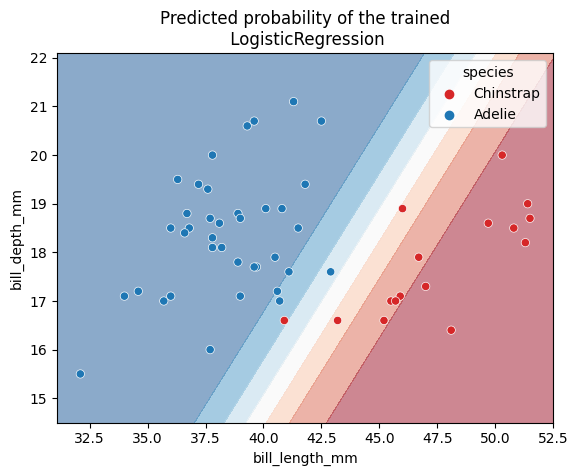

In [47]:
DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict_proba",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=penguins_test,
    x=bill_columns[0],
    y=bill_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Predicted probability of the trained\n LogisticRegression")

Sur les modèles linéaires, on peut alternativement utiliser la méthode prédict_proba pour calculer des valeurs continues (« prédictions douces ») qui correspondent à une estimation de la confiance de la cible appartenant à chaque classe.

Pour un scénario de classification binaire, la régression logistique effectue des prédictions à la fois dures et douces basées sur la fonction logistique (également calée). De la même manière que la limite de décision dure indiquée ci-dessus, on peut définir la méthode de réponse sur "predict_proba" dans DecisionBoundaryDisplay pour plutôt montrer la confiance sur l'individu. classifications. Dans ce cas, les limites codent les probabilités estimées par couleur. En particulier, lors de l'utilisation de cartes de couleurs divergentes matplotlib telles que "RdBu_r", plus la couleur est douce, plus on ne sait pas quelle classe choisir (la probabilité de 0,5 est mappée au blanc couleur).

De manière équivalente, vers les queues de la courbe, la fonction sigmoïde se rapproche de ses valeurs asymptotiques de 0 ou 1, qui sont mappées sur des couleurs plus sombres. En effet, plus la probabilité prédite est proche de 0 ou 1, plus le classificateur est confiant dans ses prédictions (fonction sigmoïde), qui est en forme de S et mappe toute entrée en une valeur comprise entre 0 et 1.